##IMPORTING LIBRARIES

In [ ]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import tensorflow as tf
from numpy import random

import cv2
from PIL import Image
import warnings

warnings.filterwarnings("ignore")


In [ ]:
import json
import zipfile
import os

In [ ]:
!pip install kaggle
# api_token = {"username":"---Your Username","key":"Your API Key"}
api_token = {"username":"","key":""}
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
kaggle.json


## Setup

In [ ]:
!pip install tensorflow_addons -q

     |████████████████████████████████| 1.1 MB 7.1 MB/s 


In [ ]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Setting seed for reproducibiltiy
SEED = 42
keras.utils.set_random_seed(SEED)

In [ ]:
import matplotlib.pyplot as plt

#**Importing KERAS**

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import os

In [ ]:
keras.backend.backend()

'tensorflow'

#**Dataset Collection**

**Download dataset**

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 97% 63.0M/65.2M [00:00<00:00, 91.1MB/s]
100% 65.2M/65.2M [00:00<00:00, 75.4MB/s]


In [ ]:
!unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

**DATASET**

*The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset.*

*We have a Train and Test image folders which contain 7 subfolders, angry, disgusted, fearful, happy, neutral, sad and surprised. Each subfolder contains image files for each category.*

In [ ]:
!ls train

angry  disgusted  fearful  happy  neutral  sad	surprised


In [ ]:
!ls test

angry  disgusted  fearful  happy  neutral  sad	surprised


In [ ]:
# defining dir variables 

train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
target_var = os.listdir(train_dir)
target_var

['sad', 'angry', 'disgusted', 'fearful', 'surprised', 'neutral', 'happy']

#**Dataset Generation : Train / Test split**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Using ImageDataGenerator to load images from directory

train_idg = ImageDataGenerator( width_shift_range = 0.1, 
                                height_shift_range = 0.1, 
                                horizontal_flip = True,    #image augmentation
                                rescale=1./255, 
                                validation_split=0.3)        # 30 percent validation split for training 

test_idg = ImageDataGenerator(rescale=1./255)

# Specifying parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Model Creation**

# **Define Training**

## Configure the hyperparameters

The hyperparameters are different from the paper. Feel free to tune
the hyperparameters yourself.

In [ ]:
# AUGMENTATION
IMAGE_SIZE = 48
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2
# OPTIMIZER
LEARNING_RATE = 0.0001
WEIGHT_DECAY = 0.000001
# TRAINING
EPOCHS = 5

## Build the ViT

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.8.2


# Data Augmentations

In [ ]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)
        
    return image

# Data Generator

# Building the Model

In [ ]:
!pip install --quiet vit-keras

from vit_keras import vit

In [ ]:
from vit_keras import vit, utils

In [ ]:
# image_size = 224#default only
image_size = 48
model_vit = vit.vit_b16(
    image_size=image_size,
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=7
)


347512832/347502902 [==============================] - 14s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
## USED FOR EXPERIMENTATION PURPOSE ##

##!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.7/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
##from keras.layers import GlobalAveragePooling2D,Input,concatenate // experimentation
##from keras.applications.inception_resnet_v2 import InceptionResNetV2
##InceptionResNetV2_ = '/content/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
##InceptionResNetV2_base = InceptionResNetV2(weights=InceptionResNetV2_,input_shape=(96,96,3), include_top=False)

In [ ]:
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
from keras.layers import Input,concatenate

In [ ]:
from tensorflow.keras import layers


In [ ]:
for layer in model_vit.layers:

   layer.trainable = False    

# add a global spatial average pooling layer
xin=Input(shape=(48,48,3))

xcv=Conv2D(32, kernel_size=(3, 3), activation='relu')(xin)
xcv=Conv2D(64, kernel_size=(3, 3), activation='relu') (xcv)
xcv=BatchNormalization()(xcv)
xcv=MaxPooling2D(2, 2)(xcv)
xcv=Dropout(0.25)(xcv)

xcv=Conv2D(128, kernel_size=(3, 3), activation='relu')(xcv)
xcv=Conv2D(128, kernel_size=(3, 3), activation='relu')(xcv)
xcv=BatchNormalization()(xcv)
xcv=MaxPooling2D(pool_size=(2, 2))(xcv)
xcv=Dropout(0.25)(xcv)

xcv=Flatten()(xcv)

#xxin=model_vit.input(xin)
x = model_vit(xin)
x = Flatten()(x)




concatenated = concatenate([x,xcv])


#add a fully-connected layer
xc = Dense(128, activation='relu')(concatenated)
xc=Dropout(0.1)(xc)




# and a fully connected output/classification layer
predictions = Dense(7, activation='softmax')(xc)
# create the full network so we can train on it
model = Model(inputs=xin, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 44, 44, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 44, 44, 64)  256         ['conv2d_1[0][0]']               
 alization)                                                                                   

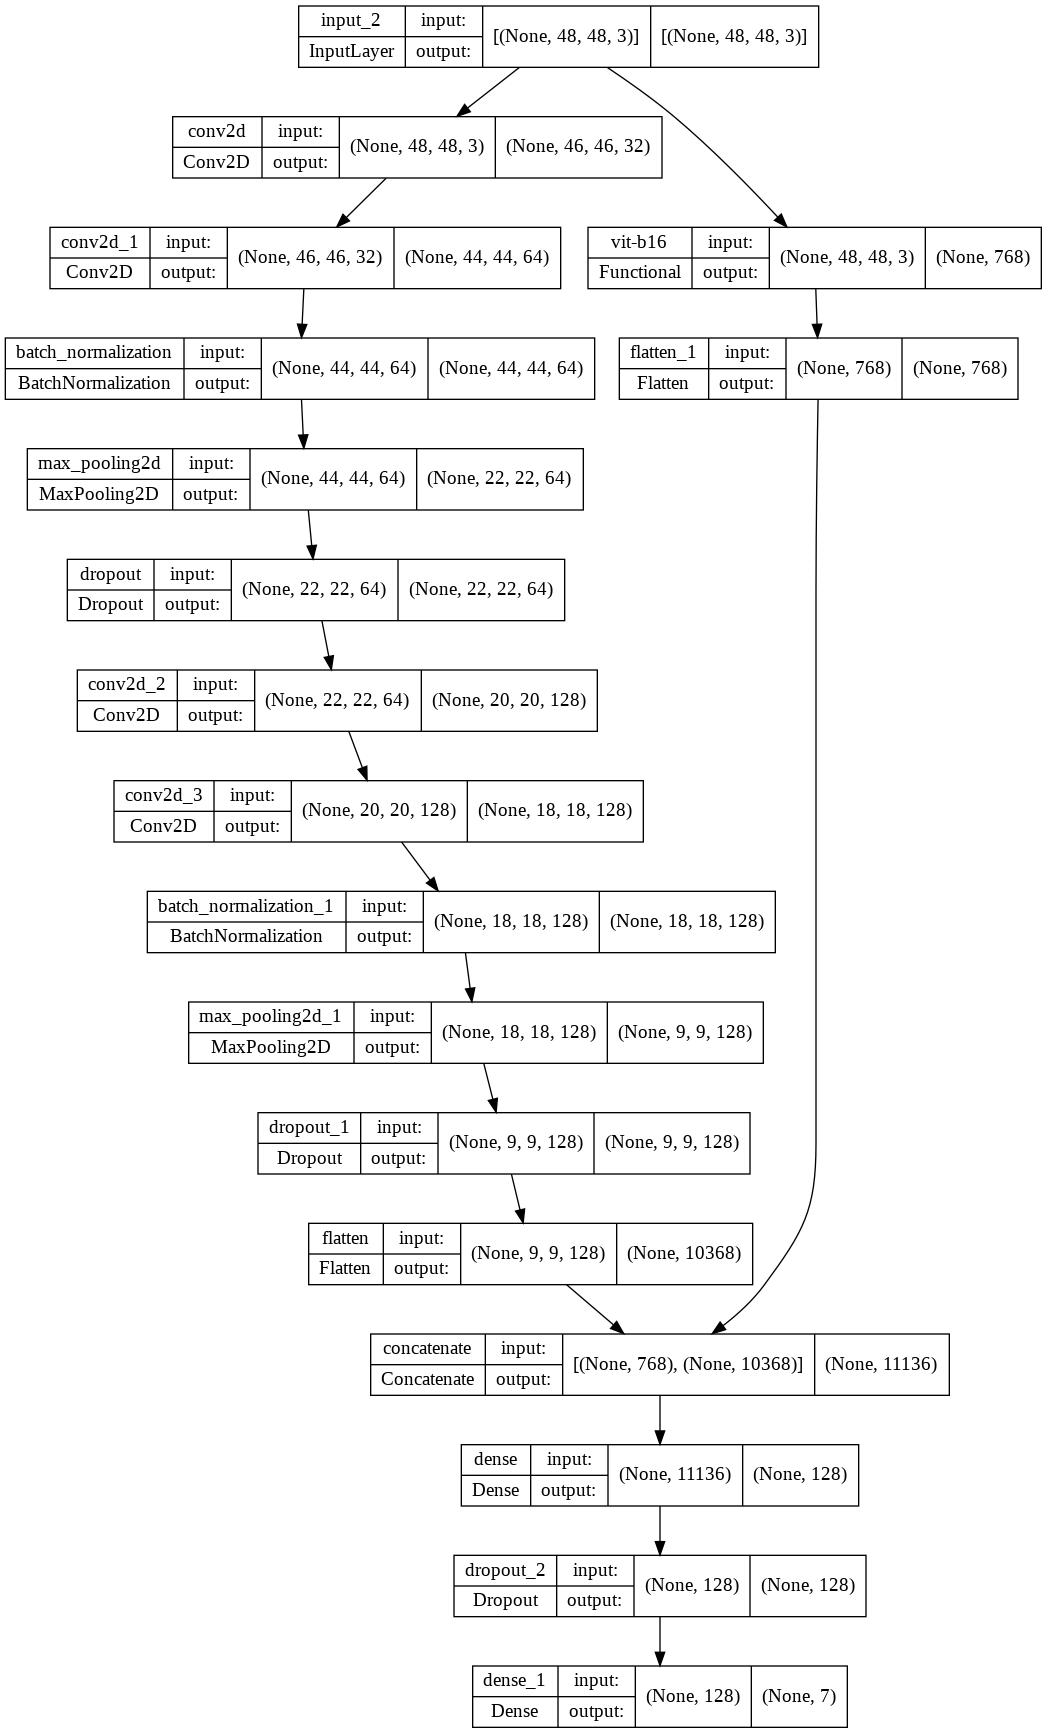

In [ ]:
tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)

In [ ]:
# step = tf.Variable(0, trainable=False)  ///// experimentation
# schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
#     [10000, 15000], [1e-0, 1e-1, 1e-2])
# # lr and wd can be a function or a tensor
# lr = 1e-1 * schedule(step)
# wd = lambda: 1e-4 * schedule(step)


In [ ]:
#step = tf.Variable(0, trainable=False) ///// experimentation
#schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
#    [10000, 15000], [1e-0, 1e-1, 1e-2])

In [ ]:
#class MyExponentialDecay(tf.keras.optimizers.schedules.ExponentialDecay): /////experimentation
# def __call__(self, step):
#   return 1e-2 * super().__call__(step)

#initial_learning_rate = 0.01
#wd = MyExponentialDecay(
 #   initial_learning_rate,
 #   decay_steps=14,
 #   decay_rate=0.8,
 #   staircase=True)
#lr = 1e-2 * schedule(step)

In [ ]:
optimizer = tfa.optimizers.AdamW(learning_rate=0.001,weight_decay = 0.000001)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [ ]:
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = tf.keras.optimizers.Adam(1e-3, decay=1e-6),
#               metrics = ['accuracy'])

In [ ]:
# train.image_shape

In [ ]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
# Using ImageDataGenerator to load images from directory

train_idg = ImageDataGenerator( width_shift_range = 0.1, 
                                height_shift_range = 0.1, 
                                horizontal_flip = True,    #image augmentation
                                rescale=1./255, 
                                validation_split=0.05)        

test_idg = ImageDataGenerator(rescale=1./255)

# Specifying parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 27278 images belonging to 7 classes.
Found 1431 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
train.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [ ]:
train.image_shape

(48, 48, 3)

In [ ]:
seed_num=42

In [ ]:
!mkdir checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint,  EarlyStopping, ReduceLROnPlateau

In [ ]:
chk_path = '/content/emotionmodel.h5'
# log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=1e-3, 
                          patience=4, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              min_delta=0.01)



callbacks = [checkpoint, earlystop,reduce_lr]

## 2. Fine-tuning the Model

In [ ]:
history=model.fit(train,validation_data= valid,batch_size=4,epochs=50,verbose=1,callbacks=callbacks)

Epoch 1/50
427/427 [==============================] - ETA: 0s - loss: 1.8882 - accuracy: 0.2694
Epoch 1: val_loss improved from inf to 1.77524, saving model to /content/emotionmodel.h5
427/427 [==============================] - 89s 125ms/step - loss: 1.8882 - accuracy: 0.2694 - val_loss: 1.7752 - val_accuracy: 0.2732 - lr: 0.0010
Epoch 2/50
427/427 [==============================] - ETA: 0s - loss: 1.6914 - accuracy: 0.3225
Epoch 2: val_loss improved from 1.77524 to 1.70891, saving model to /content/emotionmodel.h5
427/427 [==============================] - 51s 119ms/step - loss: 1.6914 - accuracy: 0.3225 - val_loss: 1.7089 - val_accuracy: 0.3131 - lr: 0.0010
Epoch 3/50
427/427 [==============================] - ETA: 0s - loss: 1.5790 - accuracy: 0.3726
Epoch 3: val_loss improved from 1.70891 to 1.65873, saving model to /content/emotionmodel.h5
427/427 [==============================] - 49s 114ms/step - loss: 1.5790 - accuracy: 0.3726 - val_loss: 1.6587 - val_accuracy: 0.3382 - lr: 0.0

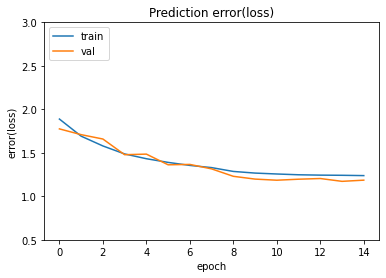

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Prediction error(loss)')
plt.ylim(0.5,3)
plt.ylabel('error(loss)')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

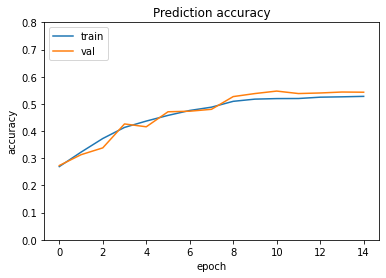

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Prediction accuracy')
plt.ylim(0,0.8)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

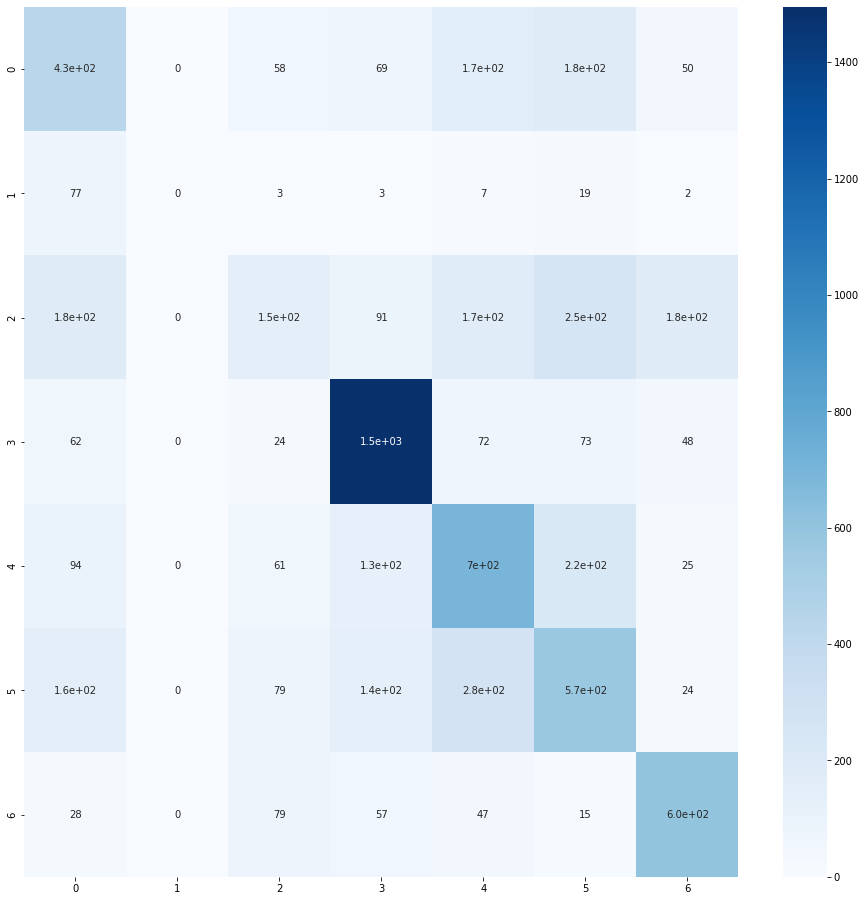

In [ ]:
predicted_classes = np.argmax(model.predict(test, steps = test.n // test.batch_size + 1), axis = 1)
true_classes = test.classes
class_labels = list(test.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)



In [ ]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.42      0.45      0.44       958
           1       0.00      0.00      0.00       111
           2       0.33      0.14      0.20      1024
           3       0.76      0.84      0.80      1774
           4       0.49      0.57      0.52      1233
           5       0.43      0.46      0.44      1247
           6       0.65      0.73      0.69       831

    accuracy                           0.55      7178
   macro avg       0.44      0.46      0.44      7178
weighted avg       0.52      0.55      0.53      7178



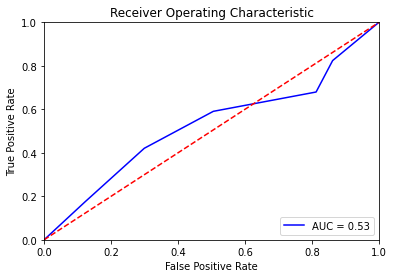

In [ ]:
fpr, tpr, thresholds = roc_curve(true_classes, predicted_classes, pos_label=2)

roc_auc = auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
class_names=list(train.class_indices.keys())

In [ ]:
from PIL import Image
img_path ="/content/ang2.jpg"

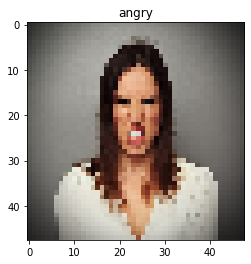

In [ ]:
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

pred=np.argmax(model.predict(img_batch))

plt.imshow(img)

plt.title(class_names[pred])
plt.show()

In [ ]:
img_path="/content/hap.jpg"

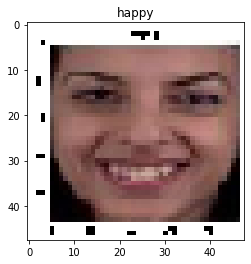

In [ ]:
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

pred=np.argmax(model.predict(img_batch))

plt.imshow(img)

plt.title(class_names[pred])
plt.show()